In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Supervised Machine Learning for Prediction

고전 통계학은 fit 데이터 원타입 데이터 모델에 관심
머신러닝은 이에 더하여 미래 예측이다. 퍼펙트 well이 아니라, reasonable well하게 맞춘다!

회귀분석에서 R**2 키우고 MSE를 줄이는 것이 항상 선호된다(ols 최소제곱법)


머신러닝에서는 우리는 우리의 모델은 exist data에는 잘 맞는데 미래는 poor한 경우가 있다. 이러한 과적합을 방지한다, **릿지 라소 회귀분석을 통해서**


## machine learning based on linear regression

In [2]:
# load necessary package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [3]:
# load the dataset
mlnfb = pd.read_csv('/content/drive/MyDrive/data analysis and coding/mlnfb.csv')
mlnfb.head()

,narcissism,age,gender,fbuse
0,5,16,1,28
1,4,14,1,15
2,6,35,0,50
3,8,38,1,50
4,4,11,1,11


In [4]:
# Define feature and lable variables
X = mlnfb[['narcissism', 'age', 'gender']] ## feature variable
y = mlnfb['fbuse'] ## label variable

In [5]:
# Split the dataset into training and test sets (30% test, 70% training)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Create a linear regression model
model = LinearRegression()

In [7]:
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [8]:
model.coef_

array([ 0.83694792,  0.83539937, -0.82615308])

In [9]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [10]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse)
print(r2)

64.91241458897552
0.5252029275416028


## ridge regression

restriction을 추가한다. 우리는 잔차제곱합 뿐 아니라 Bj역시 최소화하기 원한다. 회귀계수를 최소화하기 원한다.

왜 이러냐?

    우리 모델이 미래 데이터 잘 예측할 수 있도록 하는 것이다. eixst데이터에만 잘 맞아서 과적합 발생할 수 있으니까.

규제항을 넣는 이유를 이해해야 한다.
만약, 큰 람다라는 것은 우리는 우리는 Bj를 더 많이 규제한다는 것이다. 람다가 크다는 것은 우리는 규제를 더 크게 한다는 것이다.

람다가 0이면 우리는 그 어떠한 규제도 없다. 이럴 경우 일반적인 ols와 똑같은 것이다

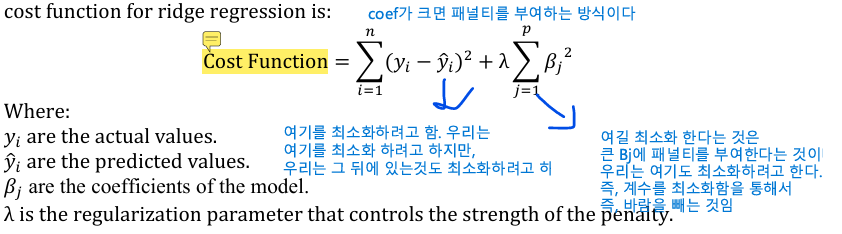

*잘못된 모델은 비용이 든다! 그래서 cost function*

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [12]:
# Load the updated dataset
df = pd.read_csv('/content/drive/MyDrive/data analysis and coding/youtubeuse.csv')

In [13]:
# Define the features and target variable with the updated column names
X = df[['age', 'education', 'income', 'loneliness']]
y = df['youtubehrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

r** 2이 줄고, MSE가 느는 것은 고전 통계학에서는 나쁜 것이지만,                                            
머신러닝에서는 아니다.  
람다가 크면 많은 패널티를 준다.(더 강한 패널티를!)
머신러닝에서는 r**2가 90이다? 그럼 정말 과적합이다(overfitting) 이 과적합을 막기 위해서 우리는 선형회귀에 패널티를 주는 것이다  

### ridge regression with lambda=1

In [14]:
# Create and train the Ridge regression model
ridge = Ridge(alpha=1) # define penalty term, aka lambda
ridge.fit(X_train_scaled, y_train)
# Make predictions
y_pred_lamda1 = ridge.predict(X_test_scaled)

# Get the coefficients from the Ridge model
ridge_coefficients = ridge.coef_
ridge_coefficients

array([ 2.15872196, -3.13319114,  0.80788244, 15.81125386])

In [15]:
# Evaluate the model
mse_lamda1 = mean_squared_error(y_test, y_pred_lamda1)
r2_lamda1 = r2_score(y_test, y_pred_lamda1)
# Output evaluation metrics
print(mse_lamda1)
print(r2_lamda1)

341.5374592180847
0.4716268556694697


### ridge regression with lambda=10

In [16]:
# Create and train the Ridge regression model
ridge = Ridge(alpha=100) # define penalty term, aka lambda
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lamda100 = ridge.predict(X_test_scaled)

# Get the coefficients from the Ridge model
ridge_coefficients = ridge.coef_
ridge_coefficients

array([ 1.83854065, -2.67382706,  0.76506129, 13.83146326])

In [17]:
# Evaluate the model
mse_lamda100 = mean_squared_error(y_test, y_pred_lamda100)
r2_lamda100 = r2_score(y_test, y_pred_lamda100)
# Output evaluation metrics
print(mse_lamda100)
print(r2_lamda100)

350.4745906951759
0.4578007287472373


# lasso regression

라쏘 회귀의 경우 모델 성능에 크게 필요 없는 즉, 중요도가 작다는 것은 회귀계수가 작은 것이니까.

라쏘 회귀에서 중요도 작은 애들은 규제를 받아서 0이 된다.
    Lasso regression modifies the cost function used in ordinary linear
    regression by adding a penalty proportional to the absolute value of the coefficients.

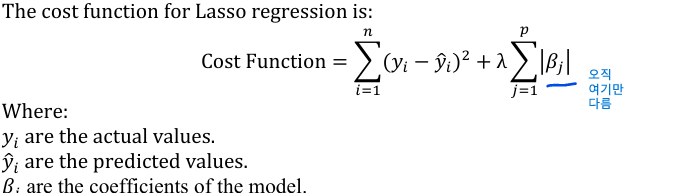

Ridge regression shrinks coefficients toward zero without
eliminating them, so all predictors remain in the model, though some may
contribute very little. Lasso, by contrast, can shrink coefficients exactly to zero,
effectively removing those predictors. This built-in feature selection makes Lasso
especially useful in high-dimensional settings where many variables may be
irrelevant or redundant, while ridge is preferable when all predictors are expected
to have some influence.

    릿지 - B를 0에 향해 가지만 제거할 수는 없음 - 그러므로 모든 ㅎ변수가 어느정도의 영향이 있는 경우에 많이 사용함.

    라쏘 - B를 0으로 만드는 것 즉, 제거하는 것이 가능함 - 그래서 관련없고 중복된 변수들이 많은 다차원 배경에서 실행하는 분석인 경우 사용한다.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [19]:
# Load the updated dataset
df = pd.read_csv('/content/drive/MyDrive/data analysis and coding/youtubeuse.csv')

In [20]:
# Define the features and target variable with the updated column names
X = df[['age', 'education', 'income', 'loneliness']]
y = df['youtubehrs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features (important for Lasso Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### lasso regression with lambda=1

In [21]:
# Create and train the Lasso regression model
lasso = Lasso(alpha=1.0)  # Alpha controls the regularization strength
lasso.fit(X_train_scaled, y_train)
# Make predictions
y_pred_lamda1 = lasso.predict(X_test_scaled)

# Get the coefficients from the Lasso model
lasso_coefficients = lasso.coef_
lasso_coefficients

array([ 1.12885891, -2.07747478,  0.        , 14.79052748])

In [22]:
# Evaluate the model
mse_lamda1 = mean_squared_error(y_test, y_pred_lamda1)
r2_lamda1 = r2_score(y_test, y_pred_lamda1)
# Output evaluation metrics
print(mse_lamda1)
print(r2_lamda1)

344.7440123048184
0.4666661800798021


### lasso regression with lambda=10

In [23]:
# Create and train the Lasso regression model
lasso = Lasso(alpha=10)  # Alpha controls the regularization strength
lasso.fit(X_train_scaled, y_train)
# Make predictions
y_pred_lamda10 = lasso.predict(X_test_scaled)

In [24]:
# Get the coefficients from the Lasso model
lasso_coefficients = lasso.coef_
lasso_coefficients

array([ 0.        , -0.        ,  0.        ,  5.67321784])

In [25]:
# Evaluate the model
mse_lamda10 = mean_squared_error(y_test, y_pred_lamda10)
r2_lamda10 = r2_score(y_test, y_pred_lamda10)
# Output evaluation metrics
print(mse_lamda10)
print(r2_lamda10)

494.3962080162209
0.23514779440981026


##Model Overfitting, Underfitting, and the Bias–Variance Tradeoff

 Bias refers to the systematic error
introduced when a model’s assumptions are too restrictive; variance refers to how
sensitive the model is to small changes in the training set

models with high bias tend to underfit because they are
too simple to capture important patterns, whereas models with high variance tend
to overfit because they attempt to capture every fluctuation in the training data,
including noise

The goal of effective machine learning is to balance these two
sources of error so that the model captures real structure without fitting noise.

과소적합 - 높은 편향을 가진다 .

만약 라소에서 규제가 쌔면
bias 커진다. variace 작아진

람다 작아지면
bias 작아진다
variance 커진다.

Bias(편향)

→ 모델이 기본적으로 얼마나 “틀린 방식”으로 배우는가.
→ “모델이 문제를 너무 단순하게 이해해서 구조를 제대로 못 배운다.”

예:
실제 관계는 곡선인데
모델이 직선으로만 설명하려고 하면 항상 오차가 발생함 → 시스템적으로 틀림.

➡ 높은 Bias = 모델이 너무 단순해서 중요한 패턴을 놓침 → 과소적합


과대적합 관련

우리가 only existing data에만 설명하면 그것은 ㅗ과대적합이다.

variace이 높으면 과대적합 문제
variance 여기서 분산은 데이터가 조금 바뀌어도 모델이 예측을 크게 바꾸는 정도이다. 즉, 모델이 너무 민감해서 훈련 데이터의 노이즈까지 외워버린 경우
그래서 높은 분산이면 모델이 너무 복잡해서 노이즈까지 학습하고 과대적합 문제가 있다.

    즉, variance 높다 -> 모델이 노이즈까지 학습해서 너무 복잡함.

    모델 복잡도가 낮으면
    → Bias ↑ Variance ↓ → Underfitting(규제가 컸다 람다가 컸다)

    모델 복잡도가 높으면
    → Bias ↓ Variance ↑ → Overfitting(규제가 작았다 람다가 작았다!)

# Supervised Machine Learning for Classification

## Logistic Regression

nominal 변수

(continuos variable은 prediction이다.)

classification 같은 경우 nomianl 변수 더미 변수 이항변수 등

(역시 존재하는 데이터에 reasonable well하게 맞춰야 겠지만, 머신러닝에서는 여기서 멈추지 않고 미래 예측까지 하고자 한다.)

In [26]:
# load necessary package
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

In [27]:
# load the dataset
mladmission = pd.read_csv('/content/drive/MyDrive/data analysis and coding/mladmission.csv')
mladmission.head()

,gender,decision,hsavg
0,0,0,77
1,1,0,79
2,1,0,82
3,0,0,81
4,0,0,88


In [28]:
# split the dataset into features and target variable
X = mladmission[['gender', 'hsavg']]
y = mladmission['decision']

# split the dataset into training and test sets: stratify train and test data to have equal portion of success in dv
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=42)

# Check if the 0/1 ratio of training data and test data is similar (similar when applying stratity option)
print(y_train.mean())
print(y_test.mean())

0.308
0.308


In [29]:
# create a logistic regression model
model = LogisticRegression()

# train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [30]:
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[170   3]
 [  4  73]]


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       173
           1       0.96      0.95      0.95        77

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250



Accuracy Score:
0.972




혼동행렬은 분류 모델이 예측한 값과 실제 정답을 비교해 정리한 2×2 표이다

혼동행렬은 네 가지 지표를 구하기 위해 필요한 것이다.
모두 혼동행렬의 네 가지 값(TP, TN, FP, FN) 없이는 계산할 수 없다.
- Precision measures the proportion of true positive predictions out of all positive
predictions.

- Recall measures the proportion of true positive predictions out of all actual positive
instances.

- The F1 Score is a metric that balances precision and recall by calculating their
harmonic mean. It provides a single measure that accounts for both false positives
and false negatives.



AUC (Class 1): 0.9895653479468509


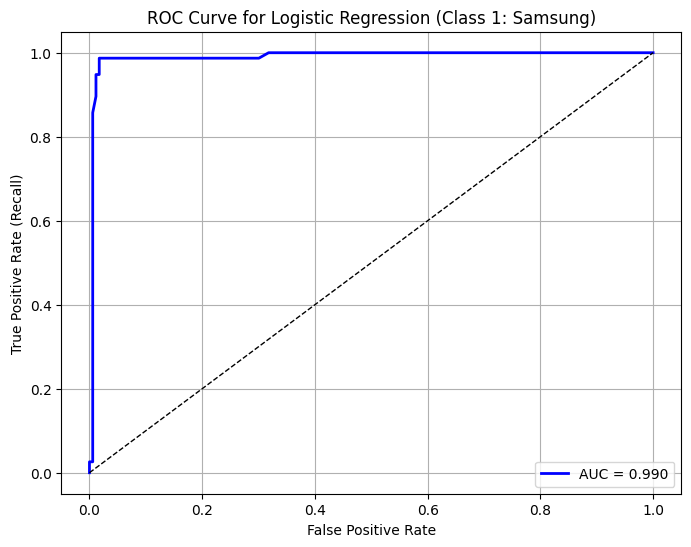

In [31]:
# ROC curve and AUC score

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict *probabilities* that the class is 1 (Samsung)
y_prob_class1 = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for class 1
fpr, tpr, thresholds = roc_curve(y_test, y_prob_class1)
roc_auc = auc(fpr, tpr)

print("AUC (Class 1):", roc_auc)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", linewidth=2, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], 'k--', linewidth=1)  # random baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression (Class 1: Samsung)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

- thresold(확률의 cutoff)를 조절하는 것만으로도 같은 확률 예측인데도 불구하고 FN FP가 달리지고 이것들로 인해 평가지표가 달리잔다.

- AUC는 특정한 컷 오프 즉, thresold과는 독립적ㅇ로 즉, 의존하지 않고 ROC전체 구간의 범위를 고려하여 이 문류 모델의 전반적인 분류 능력을 평가하는 것이다.

## knn

number of k가 classification을 다르게 한다.

KNN is non-parametric, meaning it
makes no assumptions about the data's underlying distribution, making it a flexible
choice. In KNN classification, the algorithm classifies a new data point by looking at
the K nearest neighbors (points) in the feature space, where K is a predefined
number

The core idea behind KNN is that individuals who
share similar characteristics, such as MBTI, age, or income, are likely to make similar choices about their smartphone

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
# Load the synthetic dataset
df = pd.read_csv('/content/drive/MyDrive/data analysis and coding/smartchoice.csv')

# Define the features and target variable
X = df[['I_E', 'S_N', 'T_F', 'J_P', 'age', 'gender', 'income']]
y = df['smartphone']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
# Standardize the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)  # Choose K
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

In [36]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.88
Confusion Matrix:
[[102  22]
 [ 14 162]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       124
           1       0.88      0.92      0.90       176

    accuracy                           0.88       300
   macro avg       0.88      0.87      0.88       300
weighted avg       0.88      0.88      0.88       300



In [37]:
# Create and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # Choose K
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)


# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.8833333333333333
Confusion Matrix:
[[104  20]
 [ 15 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       124
           1       0.89      0.91      0.90       176

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300



## svm

목표는 hyperplane과 soft vector 사이의 공간인margin이 최대가 되는 지점을 찾는 것이다.

The C parameter in a linear SVM model plays a crucial role in controlling the trade
off between maximizing the margin and minimizing classification errors

    trade off:
    마진을 최대화 하는 것과 분류의 오류를 최소화 하는 것 사이의 트레이드오프 관계

A small C prioritizes maximizing the margin
between different classes, allowing for some misclassifications, which leads to better
generalization and less risk of overfitting, although it may result in lower training
accuracy. On the other hand, a large C focuses on classifying the training data
perfectly by minimizing the margin between different classes, resulting in a smaller
margin and higher training accuracy, but it risks overfitting and may have difficulty
generalizing to new data.

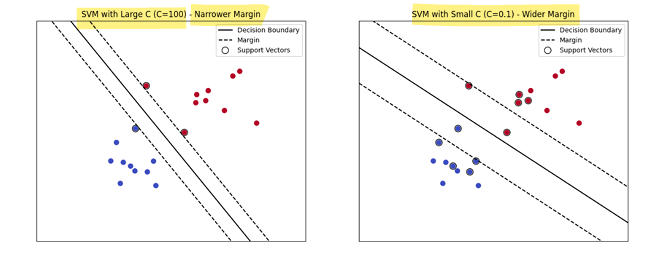

From the classification report, the precision for iPhone users is 73%, meaning that when the model predicted iPhone, it was correct 73% of the time. The
recall for iPhone users is 85%, meaning that the model successfully identified 85%
of the actual iPhone users. For Samsung users, the model achieved a higher
precision of 88%, meaning that when it predicted Samsung, it was correct 88% of
the time, with a recall of 78%, meaning that it identified 78% of actual Samsung
users.

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
# Load the synthetic dataset
df = pd.read_csv('/content/drive/MyDrive/data analysis and coding/smartchoice.csv')

In [40]:
# Define the features and target variable
X = df[['I_E', 'S_N', 'T_F', 'J_P', 'age', 'gender', 'income']]
y = df['smartphone']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [42]:
# Create and train the SVM classifier
svm = SVC(kernel='linear', C=0.1)  # linear Kernel, with regularization parameter C
svm.fit(X_train_scaled, y_train)

SVC(C=0.1, kernel='linear')

In [43]:
# Make predictions
y_pred = svm.predict(X_test_scaled)

In [44]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.81
Confusion Matrix:
[[105  19]
 [ 38 138]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.85      0.79       124
           1       0.88      0.78      0.83       176

    accuracy                           0.81       300
   macro avg       0.81      0.82      0.81       300
weighted avg       0.82      0.81      0.81       300



# decision tree

homogenious 한 애들이 모으고 heterogenious한 애들끼리 분류하는 것이 목표이다.


클러스터링의 관점에서 우리는 순수한 모델을 원한다. 즉, 순수하다는 것은 지니 계수가 작아야 한다는 것이다. 그것이 우리의 목표이다. 우리는 작은 지니계수 즉, 순수한 클러스터를 만들고 싶은 것이다.

A decision tree predicts an outcome by repeatedly splitting the
dataset into smaller subsets based on rules that best separate the classes. Each split
is chosen to maximize the “purity” of the resulting groups, often using metrics such
as Gini diversity (i.e., impurity) or information gain. As the algorithm continues
splitting, it grows a tree-like structure composed of decision nodes (questions about
a feature) and leaf nodes (final class predictions).

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [46]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data analysis and coding/smartchoice.csv')

In [47]:
# Define the features and target variable
X = df[['I_E', 'S_N', 'T_F', 'J_P', 'age', 'gender', 'income']]
y = df['smartphone']  # 0: iPhone, 1: Samsung

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [48]:
# Decision Tree with max_depth=3
tree_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=42
)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

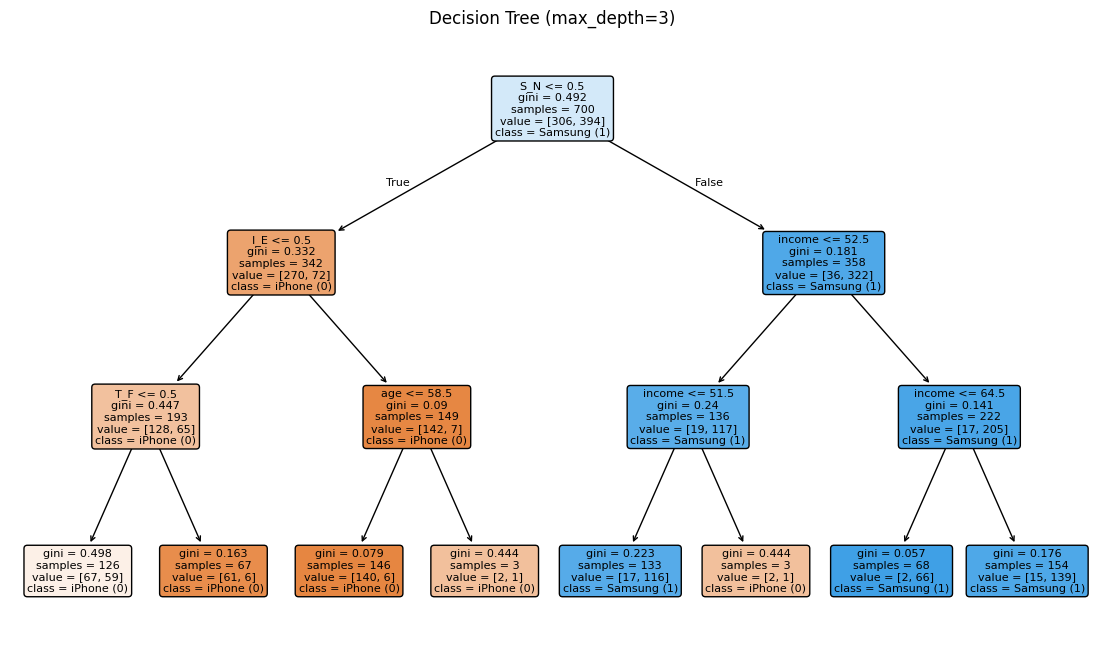

In [49]:
# visualize the tree
plt.figure(figsize=(14, 8))
plot_tree(
    tree_clf,
    feature_names=X.columns,
    class_names=['iPhone (0)', 'Samsung (1)'],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree (max_depth=3)")
plt.show()

A Decision Tree classifier works by recursively splitting the dataset into
smaller, increasingly homogeneous groups, using rules that maximize class
separation. Unlike linear models such as SVM, which find a straight-line decision
boundary, a decision tree creates a branching structure that is easy to visualize and
interpret.

(SVM처럼 직선 형태의 결정 경계를 찾는 선형 모델과 달리, 결정트리는 시각화와 해석이 쉬운 분기 구조를 만든다)

✅ 1. S–N(S_N) 변수가 가장 중요한 예측 변수인 이유

의사결정나무에서 **가장 중요한 predictor(예측 변수)**는 **루트 노드(root node)**에서 첫 번째로 데이터를 분할한 변수이다. 그게 342명이다.

👉 그림에서 가장 위(root node)에 있는 split을 보면: 첫 번째 분기 기준이 S_N(감각형(Sensing) vs 직관형(Intuitive))이다.

왜 첫 분기가 가장 중요하다고 보는가?

의사결정나무는 “가장 데이터를 잘 나누는 변수”를 먼저 선택한다.

즉,

**불순도(Gini)**를 가장 크게 줄여주는 변수

클래스 구분을 가장 잘 만들어내는 변수

가 “첫 번째 split”이 된다.

그래서 가장 위에 있는 분기 기준 = 가장 중요한 predictor라는 의미다.





In [50]:
# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("=== Decision Tree (max_depth=3) ===")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

=== Decision Tree (max_depth=3) ===
Accuracy: 0.7966666666666666
Confusion Matrix:
[[105  19]
 [ 42 134]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.85      0.77       124
           1       0.88      0.76      0.81       176

    accuracy                           0.80       300
   macro avg       0.80      0.80      0.79       300
weighted avg       0.81      0.80      0.80       300



In [51]:
# Decision Tree with max_depth=6

tree_clf = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    random_state=42
)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred = tree_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("=== Decision Tree (max_depth=6) ===")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")


=== Decision Tree (max_depth=6) ===
Accuracy: 0.8566666666666667
Confusion Matrix:
[[102  22]
 [ 21 155]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.82      0.83       124
           1       0.88      0.88      0.88       176

    accuracy                           0.86       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.86      0.86      0.86       300



# random forest

랜덤포레스트는 숲이다. 의사결정나무는 하나의 가지만 있다. 하지만 랜덤포레스트는 많은 트리가 있다는 것이다.

Random에 집중하면 어디가 랜덤할까?
    The first source of randomness is bootstrap sampling.

    The second source of randomness is random feature selection at each split.

랜덤포레스팅은 의사결정 나무 모델의 확장이다. 랜덤이라는 두 가지 특징이 있다. (과대적합 막기 위한 조치)
    

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np

In [53]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/data analysis and coding/smartchoice.csv')

In [54]:
# Define the features and target variable
X = df[['I_E', 'S_N', 'T_F', 'J_P', 'age', 'gender', 'income']]
y = df['smartphone']  # 0: iPhone, 1: Samsung

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [55]:
# Random Forest with 100 trees

rf_clf = RandomForestClassifier(
    n_estimators=100,
    min_samples_leaf=5,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

In [56]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("=== Random Forest (n_estimators=100) ===")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

=== Random Forest (n_estimators=100) ===
Accuracy: 0.8766666666666667
Confusion Matrix:
[[104  20]
 [ 17 159]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       124
           1       0.89      0.90      0.90       176

    accuracy                           0.88       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.88      0.88      0.88       300



In [57]:
# Show feature importances
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature importances:")
for i in indices:
    print(f"{X.columns[i]}: {importances[i]:.3f}")

Feature importances:
S_N: 0.633
income: 0.098
age: 0.091
I_E: 0.064
T_F: 0.051
J_P: 0.051
gender: 0.012


In [58]:
# Random Forest with 300 trees

rf_clf = RandomForestClassifier(
    n_estimators=300,
    min_samples_leaf=5,
    random_state=42
)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("=== Random Forest (n_estimators=300) ===")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

=== Random Forest (n_estimators=300) ===
Accuracy: 0.8833333333333333
Confusion Matrix:
[[104  20]
 [ 15 161]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.84      0.86       124
           1       0.89      0.91      0.90       176

    accuracy                           0.88       300
   macro avg       0.88      0.88      0.88       300
weighted avg       0.88      0.88      0.88       300

